# Description

* Creating OTUs with usearch

# Init

In [23]:
workDir = '/home/nick/notebook/RhizCG/data/MiSeq_amplicon/MergedRuns/OTU_binning/'
seqDir = '/home/nick/notebook/RhizCG/data/MiSeq_amplicon/MergedRuns/QC/'
databaseDir = '/home/bryan/RhizCG/data/databases/'

#seqFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/QC/finalQC.fasta'
nprocs = 24

In [24]:
import os
import re
import pandas as pd
from qiime.assign_taxonomy import UclustConsensusTaxonAssigner
from IPython.display import Image
from collections import Counter

In [25]:
%pylab inline
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [26]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)
library(stringr)

In [27]:
if not os.path.isdir(workDir):
    os.mkdir(workDir)

# Binning

In [6]:
%%bash -s "$workDir"

cd $1

ln -f -s ../QC/finalQC.fasta .

printf "Number of sequences in final QC fasta: "
grep -c ">" finalQC.fasta

head -n 4 finalQC.fasta
tail -n 4 finalQC.fasta

Number of sequences in final QC fasta: 17233881
>sample3-4.15_Nneg_0.1
TCCGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGCGCGCGTAGGCGGCCCGGTAAGTCCGCTCTTAAAGCCCAAGGCTCAACCTTGGGATGGGGTGGATACCGCCGGGCGCGAGTCCGGAAGAGGCGAGTGGAATTCCTGGTGTAGCGGTGGAATGCGCAGATATCAGGAGGAACACCAATAGCGAAGGCAGCTCGCTGGGACGGTACTGACGCTAAGGCGCGAAAGCGTGGGGAGCGAACAGG
>sample5-1.06_Nneg_1.1
TACGTAGGGGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGCGCGCAGGCGGCCAGGTAGGTCCGCTGTGAAAGCTCCAGGCTCAACCTCGAGACGTCAGCGGAAACCCTCTGGCTAGAGTCCGGAAGAGGAGAGTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAAGAACACCCGTGGCGAAGGCGGCTCTCTGGGACGGTACTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG
>sample3-2.19_Npos_1606041.4
TACGGAGGGTGCAAGCGTTATCAGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAAGTAAGTCAGTGGTGAAATCTCTGGGCTTAACCCAGAAACTGCCGTTGATACTATTTGCCTTGAATATCATGGAGGTAAGCGGAATTTGTCATGTAGCGGTGAAATGCTTAGATATGACATAGAACACCGATAGCGAAGGCAGCTTACTACATGTTAATTGACGCTGAGGCACGAAAGCGTGGGGAGCAAACAGG
>sample8-1.14_Nneg_1606043.4
TACGTAGGGGGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGCAGGTGGTCATGCAAGACAGATGTGAAATCCCCGGGCTT

# Usearch pipeline
##dereplicate with Mothur unique seqs

In [7]:
%%bash -s "$workDir" "$seqFile"

cd $1

mothur "#unique.seqs(fasta=$2)" 







mothur v.1.32.1
Last updated: 10/16/2013

by
Patrick D. Schloss

Department of Microbiology & Immunology
University of Michigan
pschloss@umich.edu
http://www.mothur.org

When using, please cite:
Schloss, P.D., et al., Introducing mothur: Open-source, platform-independent, community-supported software for describing and comparing microbial communities. Appl Environ Microbiol, 2009. 75(23):7537-41.

Distributed under the GNU General Public License

Type 'help()' for information on the commands that are available

Type 'quit()' to exit program



mothur > unique.seqs(fasta=/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/QC/finalQC.fasta)
1000	22
2000	35
3000	48
4000	48
5000	48
6000	48
7000	48
8000	48
9000	48
10000	48
11000	48
12000	48
13000	48
14000	48
15000	48
16000	48
17000	48
18000	48
19000	48
20000	48
21000	48
22000	48
23000	48
24000	48
25000	48
26000	48
27000	48
28000	48
29000	48
30000	48
31000	48
32000	48
33000	48
34000	48
35000	48
36000	48
37000	48
38000	48
39000	48
40000	4

In [14]:
%%bash -s "$seqDir"

cd $1

ln -f -s ../QC/finalQC.unique.fasta .

printf "Number of sequences in final QC unique fasta: "
grep -c ">" finalQC.unique.fasta

head -n 4 finalQC.unique.fasta
tail -n 4 finalQC.unique.fasta

Number of sequences in final QC unique fasta: 10664059
>sample3-4.15_Nneg_0.1
TCCGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGCGCGCGTAGGCGGCCCGGTAAGTCCGCTCTTAAAGCCCAAGGCTCAACCTTGGGATGGGGTGGATACCGCCGGGCGCGAGTCCGGAAGAGGCGAGTGGAATTCCTGGTGTAGCGGTGGAATGCGCAGATATCAGGAGGAACACCAATAGCGAAGGCAGCTCGCTGGGACGGTACTGACGCTAAGGCGCGAAAGCGTGGGGAGCGAACAGG
>sample5-1.06_Nneg_1.1
TACGTAGGGGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGCGCGCAGGCGGCCAGGTAGGTCCGCTGTGAAAGCTCCAGGCTCAACCTCGAGACGTCAGCGGAAACCCTCTGGCTAGAGTCCGGAAGAGGAGAGTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAAGAACACCCGTGGCGAAGGCGGCTCTCTGGGACGGTACTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG
>sample3-2.19_Npos_1606041.4
TACGGAGGGTGCAAGCGTTATCAGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGGCAAGTAAGTCAGTGGTGAAATCTCTGGGCTTAACCCAGAAACTGCCGTTGATACTATTTGCCTTGAATATCATGGAGGTAAGCGGAATTTGTCATGTAGCGGTGAAATGCTTAGATATGACATAGAACACCGATAGCGAAGGCAGCTTACTACATGTTAATTGACGCTGAGGCACGAAAGCGTGGGGAGCAAACAGG
>sample8-1.14_Nneg_1606043.4
TACGTAGGGGGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGCAGGTGGTCATGCAAGACAGATGTGAAATCCC

ln: `../QC/finalQC.unique.fasta' and `./finalQC.unique.fasta' are the same file


    ##Notes: High number of unique sequences.  

##example of target file

In [75]:
%%bash 

cd '/home/bryan/RhizCG/data/MiSeq_amplicon/150522_run1_rerun/OTU_binning/'

head -n 4 finalQC_uniques.fasta



>sample6-4.12_Npos_47;size=226215;
GACAGAGGATGCAAGCGTTATCCGGAATGATTGGGCGTAAAGCGTCTGTAGGTGGCTTTTCAAGTCCGCCGTCAAATCCC
AGGGCTCAACCCTGGACAGGCGGTGGAAACTACCAAGCTGGAGTACGGTAGGGGCAGAGGGAATTTCCGGTGGAGCGGTG
AAATGCATTGAGATCGGAAAGAACACCAACGGCGAAAGCACTCTGCTGGGCCGACACTGACACTGAGAGACGAAAGCTAG


##Example of curent unique.fasta

In [92]:
%%bash -s "$seqDir"

cd $1

head -n 4 finalQC.unique.fasta

>sample3-4.15_Nneg_0.1
TCCGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGCGCGCGTAGGCGGCCCGGTAAGTCCGCTCTTAAAGCCCAAGGCTCAACCTTGGGATGGGGTGGATACCGCCGGGCGCGAGTCCGGAAGAGGCGAGTGGAATTCCTGGTGTAGCGGTGGAATGCGCAGATATCAGGAGGAACACCAATAGCGAAGGCAGCTCGCTGGGACGGTACTGACGCTAAGGCGCGAAAGCGTGGGGAGCGAACAGG
>sample5-1.06_Nneg_1.1
TACGTAGGGGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGCGCGCAGGCGGCCAGGTAGGTCCGCTGTGAAAGCTCCAGGCTCAACCTCGAGACGTCAGCGGAAACCCTCTGGCTAGAGTCCGGAAGAGGAGAGTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAAGAACACCCGTGGCGAAGGCGGCTCTCTGGGACGGTACTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG


### Adding sequence counts to finalQC.unique.fasta in order to run in usearch


__Required format:__ `>SEQID;size=SIZE;`

In [28]:
!cd $seqDir; ls 

finalQC.count  finalQC.names	     trialcount.txt
finalQC.fasta  finalQC.unique.fasta  trial.txt


In [38]:
%%bash -s $seqDir

cd $1

mothur "#count.seqs(name=finalQC.names)"







mothur v.1.32.1
Last updated: 10/16/2013

by
Patrick D. Schloss

Department of Microbiology & Immunology
University of Michigan
pschloss@umich.edu
http://www.mothur.org

When using, please cite:
Schloss, P.D., et al., Introducing mothur: Open-source, platform-independent, community-supported software for describing and comparing microbial communities. Appl Environ Microbiol, 2009. 75(23):7537-41.

Distributed under the GNU General Public License

Type 'help()' for information on the commands that are available

Type 'quit()' to exit program



mothur > count.seqs(name=finalQC.names)

Using 1 processors.
It took 33 secs to create a table for 17233881 sequences.


Total number of sequences: 17233881

Output File Names: 
finalQC.count_table


mothur > quit()


In [39]:
!cd $seqDir; head finalQC.count

sample3-4.15_Nneg_0.1	size=1
sample5-1.06_Nneg_1.1	size=1
sample6-4.27_Nneg_2.1	size=47
sample1-4.27_Nneg_3.1	size=1
sample5-1.16_Npos_4.1	size=1
sample2-1.06_Nneg_5.1	size=1
sample1-3.07_Npos_6.1	size=1
sample2-1.06_Npos_7.1	size=1
sample6-3.07_Nneg_8.1	size=1
sample2-1.06_Npos_9.1	size=1


In [61]:
# files in the same order?
!cd $seqDir; grep -c ">" finalQC.unique.fasta
!wc -l finalQC.count
!head finalQC.unique.fasta finalQC.count
!echo '---------------'
!tail finalQC.unique.fasta finalQC.count

10664059
10664059 finalQC.count
==> finalQC.unique.fasta <==
>sample3-4.15_Nneg_0.1
TCCGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGCGCGCGTAGGCGGCCCGGTAAGTCCGCTCTTAAAGCCCAAGGCTCAACCTTGGGATGGGGTGGATACCGCCGGGCGCGAGTCCGGAAGAGGCGAGTGGAATTCCTGGTGTAGCGGTGGAATGCGCAGATATCAGGAGGAACACCAATAGCGAAGGCAGCTCGCTGGGACGGTACTGACGCTAAGGCGCGAAAGCGTGGGGAGCGAACAGG
>sample5-1.06_Nneg_1.1
TACGTAGGGGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGCGCGCAGGCGGCCAGGTAGGTCCGCTGTGAAAGCTCCAGGCTCAACCTCGAGACGTCAGCGGAAACCCTCTGGCTAGAGTCCGGAAGAGGAGAGTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAAGAACACCCGTGGCGAAGGCGGCTCTCTGGGACGGTACTGACGCTGAGGCGCGAAAGCGTGGGGAGCGAACAGG
>sample6-4.27_Nneg_2.1
TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTACGCAGGCGGCTTTGCAAGACAGGTGTGAAATCCCCGGGCCTAACCTGGGAACTGCATTTGTGACTGCATGGCTAGAGTTTGTCAGAGGGGGGTGGAATTCCACGTGTAGCAGTGAAATGCGTAGATATGCGGAGGAACACCGATGGCGAAGGCAATCCCCTGGACCTGTACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGG
>sample1-4.27_Nneg_3.1
TACAGAGGGTGCAAGCGTTGTTCGGAATCATTGGGCGTAAAGGGCGTGTAGGCGGTTTGTTAAGTCATGTGTGAAATCCCTCGGCT

In [63]:
#Adding size to sequence ID
## fasta and count are in the same order

os.chdir(seqDir)

fastaFile = 'finalQC.unique.fasta'
countFile = 'finalQC.count'
outFile = 'finalQC.unique.size.fasta'

re1 = re.compile('\t+')

outFH = open(outFile, 'wb')

with open(fastaFile, 'rb') as inFasta, open(countFile, 'rb') as inCount:
    for newID in inCount:
        newID = '>' + re1.sub(';', newID)
        oldID = inFasta.readline()
        seq = inFasta.readline()
        outFH.write(newID + seq)
        
outFH.close()

In [ ]:
#Generate new tab delim file with sequence id and count of occurences
#%cd $seqDir

#trial = open('finalQC.names', 'r')
#trialcount = open('finalQC.count', 'w')

#for line in trial:
#        Seq, Occur = line.split('\t')
#        outp = Seq + '\t' + 'size='+ (str(line.count(',') + 1) + "\n") 
#        trialcount.write(outp)
        
#trial.close()
#trialcount.close()
#print "All Done"

In [64]:
!cd $seqDir; \
    usearch -sortbysize finalQC.unique.size.fasta \
    -output finalQC_unique_sorted.fasta -minsize 2  #-minsize 2

usearch v7.0.1090_i86linux32, 4.0Gb RAM (132Gb total), 40 cores
(C) Copyright 2013 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

Licensed to: chuck.peperanney@gmail.com

00:13 3.4Gb  100.0% Reading finalQC.unique.size.fasta
00:13 3.4Gb Getting sizes                            
00:24 3.5Gb Sorting 648418 sequences
00:27 3.5Gb  100.0% Writing finalQC_unique_sorted.fasta


In [68]:
!cd $seqDir; \
    tail finalQC_unique_sorted.fasta

>sample6-4.12_Npos_3886290.1;size=2
TACGAAGGGTGCAAGCGTTATCCGGATTCATTGGGCTTAAAGGGTGCGTAGGCGGGGCAATAAGTCAGTGGTGAAATCCT
GCGGCTTAACCGTAGAATTGCCATTGATACTGTTGCTCTTGAGTAGGCTCGACGTGGGCGGAATGTGCCGTGTAGCGGTG
AAATGCTTAGATATGGCACAGAACACCGATAGTGAAGACAGCTCACGAGGGCCAAACTGACGCTGAGGCACGAAAGCGTG
GGGATCGAACAGG
>sample3-2.05_Nneg_3886316.1;size=2
GACAGAGGGCGCGAGCGTTGTTCGGAATTACTGGGCTTAAAGCGCACGTAGGCGGCATCGTAAGTGTCCGGTGAAATCCC
ACGGCTCACCCGTGGAACTGCCTGGCAGACTGCGATGCTCGAGTATGGTAGGGGAGAGCGGAACTCCTGGTGGAGCGGTG
AAATGCGTAGATATCAGGAGGAACACCGGTGGCGAAGGCGGCTCTCTGGTCCATGTCTGACGCTGAGGTGCGAAAGCTAG
GGGAGCAAACGGG


In [69]:
!cd $seqDir; \
    usearch -cluster_otus finalQC_unique_sorted.fasta -otus otus.fasta

usearch v7.0.1090_i86linux32, 4.0Gb RAM (132Gb total), 40 cores
(C) Copyright 2013 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

Licensed to: chuck.peperanney@gmail.com

07:23 662Mb  100.0% 12712 OTUs
                              
Input seqs  648418 (648.4k)
      OTUs  12712 (12.7k)
   Members  503443 (503.4k)
  Chimeras  132263 (132.3k)
   Max mem  662Mb
      Time  07:24
Throughput  1460.4 seqs/sec.



In [70]:
!cd $seqDir; \
    /opt/bioinfo/edgar_python_scripts/fasta_number.py otus.fasta OTU. > otusn.fasta

# Removing sequences classified as chloroplast, eukaryotes, or archaea

In [13]:
%%bash -s "$workDir" "$databaseDir" "$nprocs"

cd $1

parallel_assign_taxonomy_uclust.py \
    -r $2'97_Silva_111_rep_set_no_ambig.fasta' \
    -t $2'Silva_111_taxa_map_full.txt' \
    -O 8 \
    -i otusn.fasta \
    -o otusn_tax

In [14]:
%%bash -s "$workDir" "$databaseDir"

cd $1

egrep "Chloroplast|Eukaryota|Archaea|Unassigned|mitochondria" \
    otusn_tax/otusn_tax_assignments.txt |\
    awk '{print $1}' > to_remove_tax.accnos

In [15]:
!cd $workDir; wc -l to_remove_tax.accnos

636 to_remove_tax.accnos


In [16]:
!cd $workDir; head to_remove_tax.accnos

OTU.699
OTU.902
OTU.765
OTU.377
OTU.77
OTU.73
OTU.883
OTU.298
OTU.1
OTU.2


In [17]:
!cd $workDir; \
    mothur "#remove.seqs(fasta=otusn.fasta, accnos=to_remove_tax.accnos)" | head -n 50







mothur v.1.32.1
Last updated: 10/16/2013

by
Patrick D. Schloss

Department of Microbiology & Immunology
University of Michigan
pschloss@umich.edu
http://www.mothur.org

When using, please cite:
Schloss, P.D., et al., Introducing mothur: Open-source, platform-independent, community-supported software for describing and comparing microbial communities. Appl Environ Microbiol, 2009. 75(23):7537-41.

Distributed under the GNU General Public License

Type 'help()' for information on the commands that are available

Type 'quit()' to exit program



mothur > remove.seqs(fasta=otusn.fasta, accnos=to_remove_tax.accnos)
Removed 636 sequences from your fasta file.

Output File Names: 
otusn.pick.fasta


mothur > quit()


In [18]:
!cd $workDir; grep -c ">" otusn.fasta
!cd $workDir; grep -c ">" otusn.pick.fasta

7731
7095


# Mapping reads

In [19]:
%%bash -s "$workDir"

cd $1

perl -pe 's/^>(.+)(_[^_]+)\n$/>$1$2;barcodelabel=$1\n/' finalQC.fasta > finalQC_usearchfmt.fasta

In [20]:
!cd $workDir; head finalQC_usearchfmt.fasta

>sample6-3.07_Npos_0;barcodelabel=sample6-3.07_Npos
TACAGAGGGTGCAAACGTTGCTCGGAATTACTGGGCGTAAAGCGCGTGTAGGCGGCTCCGTAAGTCGGGTGTGAAATCCCTCGGCTCAACTGAGGAAGTGCACTCGATACTGCAGAGCTAGAGTACCGGAGAGGGTGGTGGAATTCCTGGTGTAGAGGTGAAATTCGTAGATATCAGGAGGAACACCGGCGGCGAAGGCGGCCACCTGGACGGATACTGACGCTCAGACGCGAAAGCGTGGGTAGCAAACAGG
>sample1-3.07_Nneg_2492020;barcodelabel=sample1-3.07_Nneg
TACAGAGGGTGCAAACGTTGCTCGGAATTACTGGGCGTAAAGCGCGTGTAGGCGGCTCCGTAAGTCGGGTGTGAAATCCCTCGGCTCAACTGAGGAAGTGCACTCGATACTGCAGAGCTAGAGTACCGGAGAGGGTGGTGGAATTCCTGGTGTAGAGGTGAAATTCGTAGATATCAGGAGGAACACCGGCGGCGAAGGCGGCCACCTGGACGGATACTGACGCTCAGACGCGAAAGCGTGGGTAGCAAACAGG
>sample1-3.07_Nneg_2492211;barcodelabel=sample1-3.07_Nneg
TACAGAGGGTGCAAACGTTGCTCGGAATTACTGGGCGTAAAGCGCGTGTAGGCGGCTCCGTAAGTCGGGTGTGAAATCCCTCGGCTCAACTGAGGAAGTGCACTCGATACTGCAGAGCTAGAGTACCGGAGAGGGTGGTGGAATTCCTGGTGTAGAGGTGAAATTCGTAGATATCAGGAGGAACACCGGCGGCGAAGGCGGCCACCTGGACGGATACTGACGCTCAGACGCGAAAGCGTGGGTAGCAAACAGG
>sample3-3.07_Npos_2711613;barcodelabel=sample3-3.07_Npos
TACAGAGGGTGC

In [21]:
!cd $workDir; grep -c ">" finalQC_usearchfmt.fasta

5134019


In [22]:
!cd $workDir; \
usearch -usearch_global finalQC_usearchfmt.fasta \
    -db otusn.pick.fasta \
    -strand plus -id 0.97 \
    -uc readmap.uc \
    -threads $nprocs

usearch v7.0.1090_i86linux32, 4.0Gb RAM (132Gb total), 40 cores
(C) Copyright 2013 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

Licensed to: chuck.peperanney@gmail.com

00:00  19Mb Reading otusn.pick.fasta, 1.9Mb
00:00  21Mb 7095 seqs, min 243, avg 253, max 278nt
00:00  21Mb  100.0% Masking
00:00  21Mb  100.0% Word stats
00:00  29Mb  100.0% Building slots
00:00  29Mb  100.0% Build index
00:48 277Mb  100.0% Searching, 43.8% matched


In [23]:
!cd $workDir; \
    python /opt/bioinfo/edgar_python_scripts/uc2otutab.py readmap.uc > otu_table.txt

readmap.uc 100.0%   


In [24]:
%%bash -s "$workDir"

cd $1

if [ -f otu_table.biom ]; then
    rm otu_table.biom
fi #This is to mitigate a biom bug

biom convert -i otu_table.txt -o otu_table.biom --table-type "otu table"

In [25]:
%%bash -s "$workDir"

cd $1

if [ -f otu_table_summary.txt ]; then
    rm otu_table_summary.txt
fi #This is to mitigate a biom bug

biom summarize-table -i otu_table.biom -o otu_table_summary.txt

In [26]:
!cd $workDir; cat otu_table_summary.txt

Num samples: 139
Num observations: 7095
Total count: 2246311
Table density (fraction of non-zero values): 0.315
Table md5 (unzipped): a1bec55137de33d785b4cb1a783ed9b5

Counts/sample summary:
 Min: 1.0
 Max: 53857.0
 Median: 14479.000
 Mean: 16160.511
 Std. dev.: 9719.549
 Sample Metadata Categories: None provided
 Observation Metadata Categories: None provided

Counts/sample detail:
 H20_Control: 1.0
 Negative_Control: 13.0
 Positive_Control: 26.0
 sample3-1.09_Npos: 4206.0
 sample2-1.08_Npos: 4627.0
 sample5-1.29_Npos: 5069.0
 sample3-1.09_Nneg: 5216.0
 sample3-3.06_Npos: 5711.0
 sample2-1.08_Nneg: 5862.0
 sample5-1.22_Npos: 5872.0
 sample3-2.03_Npos: 5978.0
 sample1-1.27_Npos: 6315.0
 sample2-3.05_Npos: 6622.0
 sample4-1.03_Npos: 6647.0
 sample5-3.11_Npos: 6733.0
 sample5-1.25_Npos: 6801.0
 sample4-1.03_Nneg: 7137.0
 sample5-3.27_Npos: 7155.0
 sample5-1.16_Npos: 7171.0
 sample1-3.08_Npos: 7296.0
 sample1-1.27_Nneg: 7312.0
 sample5-3.16_Npos: 7331.0
 sample5-2.18_Npos: 7757.0
 sample5

# Assessing the taxonomic composition in the water controls

In [36]:
%%R -i workDir

setwd(workDir)

tbl.otu = read.delim('otu_table.txt', sep='\t')
tbl.tax = read.delim('otusn_tax/otusn_tax_assignments.txt', header=F)

tbl.otu.H2O = tbl.otu %>% 
    select(OTUId, Negative_Control) %>%
    filter(Negative_Control > 0)

In [37]:
%%R
# taxonomic levels
tbl.j = left_join(tbl.otu.H2O, tbl.tax, by=c('OTUId' = 'V1'))

add_levels = function(x){
    x = as.character(x)
    x = gsub('__', '', x)
    y = str_split(x, '; ')
    y.len = length(y[[1]])
    for(i in y.len:7){
        if(i != 7){
            x = paste(c(x, 'unclassified'), collapse='; ')
            }
        }
    return(x)
    }

tbl.j = tbl.j %>%
    mutate(V2 = sapply(V2, add_levels)) %>%
    separate(V2, c('domain', 'phylum', 'class', 'order', 'family', 'genus', 'species'), sep='; ')

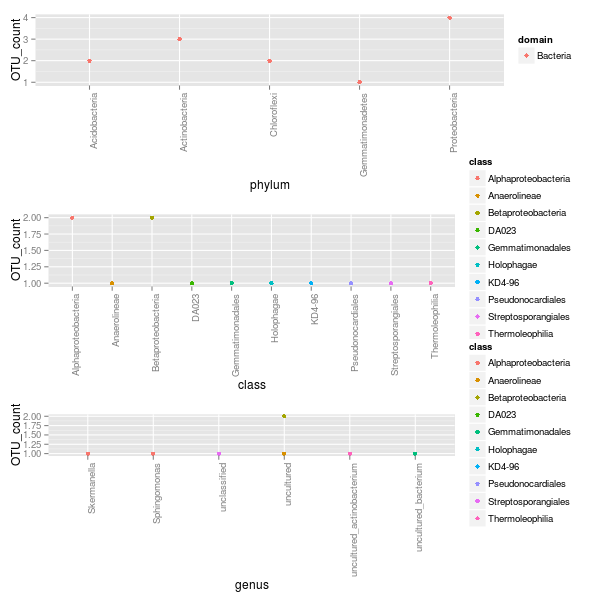

In [38]:
%%R -h 600 -w 600

tbl.j = tbl.j %>%
    arrange(Negative_Control)

tbl.j.phylum = tbl.j %>%
    group_by(domain, phylum) %>%
    summarize(
        OTU_count = n(),
        abundance = sum(Negative_Control)
    )

p1 = ggplot(tbl.j.phylum, aes(phylum, OTU_count, color=domain)) +
    geom_point() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1)
        )


tbl.j.class = tbl.j %>%
    group_by(class) %>%
    summarize(
        OTU_count = n(),
        abundance = sum(Negative_Control)
    )

p2 = ggplot(tbl.j.class, aes(class, OTU_count, color=class)) +
    geom_point() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1)
        )


tbl.j.genus = tbl.j %>%
    group_by(class, genus) %>%
    summarize(
        OTU_count = n(),
        abundance = sum(Negative_Control)
    )

p3 = ggplot(tbl.j.genus, aes(genus, OTU_count, color=class)) +
    geom_point() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1)
        )

grid.arrange(p1, p2, p3, ncol=1)